In [60]:
import gmaps
import numpy as np
import pandas as pd
import os
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# # Google developer API key
# from config import gkey

# # Configure gmaps
# gmaps.configure(api_key=gkey)

# Create aiport dataframe

path = pd.read_csv('indeed_job_dataset_V2_CSV.csv')
df = pd.DataFrame(path)
df
# airport_df = pd.read_csv('../Resources/Airport_Output.csv')
df.fillna(0) 
df

,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
df_cleaned = df.dropna(subset=['No_of_Skills'])

# df.loc[df['No_of_Skills']].dropna()
df_cleaned.head()
df_cleaned


,Unnamed: 0,Job_Title,Link,Queried_Salary,Salary_Index,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,...,MD,DC,NC,Other_states,Consulting and Business Services,Internet and Software,Banks and Financial Services,Health Care,Insurance,Other_industries
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,1,data_scientist,"['SAP', 'SQL']",2.0,Express Scripts,3301.0,...,0,0,0,1,0,0,0,1,0,0
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,1,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5.0,Money Mart Financial Services,NaN,...,0,0,0,0,0,0,0,0,0,0
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,1,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9.0,comScore,62.0,...,0,0,0,1,0,0,0,0,0,0
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,1,data_scientist,['Certified Internal Auditor'],1.0,Central Intelligence Agency,158.0,...,0,1,0,0,0,0,0,0,0,1
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,1,data_scientist,"['Statistical Software', 'Time Management', 'R...",7.0,Federal Reserve Bank of Dallas,495.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5710,5710,Senior Data Engineer,https://www.indeed.com/rc/clk?jk=fbe2dd71643b3...,>160000,6,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",12.0,Intelliswift Software Inc,NaN,...,0,0,0,0,0,0,0,0,0,0
5711,5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",https://www.indeed.com/rc/clk?jk=70ee8b9bb5a2b...,>160000,6,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",8.0,Jobspring Partners,31.0,...,0,0,0,0,0,0,0,0,0,1
5712,5712,Executive Director- Architect: Data Engineerin...,https://www.indeed.com/rc/clk?jk=2c2a7f94f6ed1...,>160000,6,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",13.0,JPMorgan Chase,21159.0,...,0,0,0,1,0,0,1,0,0,0
5713,5713,"Senior Manager, Data Engineering (hands on)",https://www.indeed.com/rc/clk?jk=1051e100b300b...,>160000,6,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",15.0,Capital One,6791.0,...,0,0,0,0,0,0,1,0,0,0


                No_of_Skills
Queried_Salary              
<80000              4.410480
80000-99999         6.473154
100000-119999       8.606618
120000-139999       9.767296
140000-159999       9.727378
>160000             8.007353


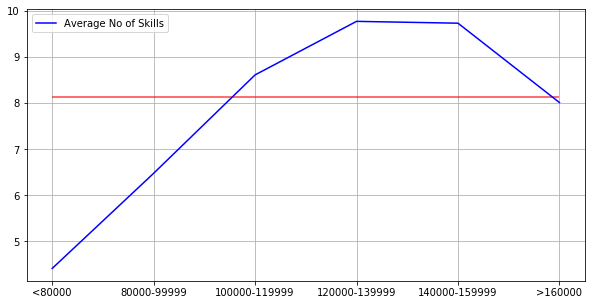

In [134]:
salary=df_cleaned.groupby("Queried_Salary")["No_of_Skills"].mean()
salary_df=pd.DataFrame(salary)
resalary_df=salary_df.reindex(index=["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"])
print(resalary_df)

total_avg_skill=df_cleaned["No_of_Skills"].mean()

plt.figure(figsize=(10,5))
x=[1,2,3,4,5,6]
y=resalary_df["No_of_Skills"]
xticks=["<80000","80000-99999","100000-119999","120000-139999","140000-159999",">160000"]
plot1=plt.plot(x,y,color="blue", label="Average No of Skills")
plt.xticks(x,xticks)
plt.hlines(total_avg_skill,1,6,alpha=0.75, color="red", label="Average Total")
plt.legend(handles=plot1,loc="best")
plt.grid()
plt.show()



## 

                Job_Type
data_scientist      2496
data_analyst        1630
data_engineer       1357


Text(0, 0.5, 'Number of Job Listings')

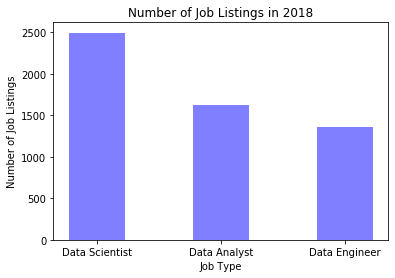

In [119]:
#Which is more in demand (data scientist, analyst, engineer?)
#What is the difference between them?

job_type=df_cleaned["Job_Type"].value_counts()
job_type_df=pd.DataFrame(job_type)
print(job_type_df)

listing=job_type_df["Job_Type"]
x_axis = [1,2,3]

width=0.45
plt.bar(x_axis, listing, width, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Data Scientist", "Data Analyst", "Data Engineer"])


plt.title("Number of Job Listings in 2018")
plt.xlabel("Job Type")
plt.ylabel("Number of Job Listings")

In [113]:
#Skills for each job type?
skill_set_type=df_cleaned.groupby("Job_Type")[["python","sql","machine learning","r","hadoop","tableau","sas","spark","java","Others"]].sum()
skill_set_type.head()

,python,sql,machine learning,r,hadoop,tableau,sas,spark,java,Others
Job_Type,,,,,,,,,,
data_analyst,512,1044,166,456,126,538,310,67,101,1462
data_engineer,901,867,289,228,761,214,67,719,704,1338
data_scientist,1912,1193,1842,1550,827,484,564,745,675,2352


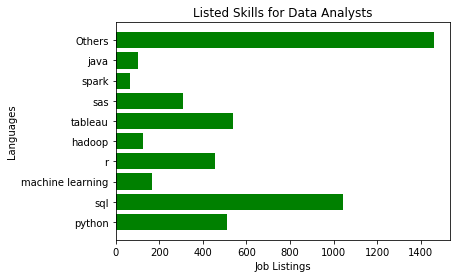

In [131]:
#Credit: https://benalexkeen.com/bar-charts-in-matplotlib/
x=list(skill_set_type.columns.values)
data_analyst = skill_set_type.iloc[0,:]
data_engineer = skill_set_type.iloc[1,:]
data_scientist = skill_set_type.iloc[2,:]


# x = ['Nuclear', 'Hydro', 'Gas', 'Oil', 'Coal', 'Biofuel']
# energy = [5, 6, 15, 22, 24, 8]

x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data_analyst, color='green')
plt.ylabel("Languages")
plt.xlabel("Job Listings")
plt.title("Listed Skills for Data Analysts")

plt.yticks(x_pos, x)

plt.show()

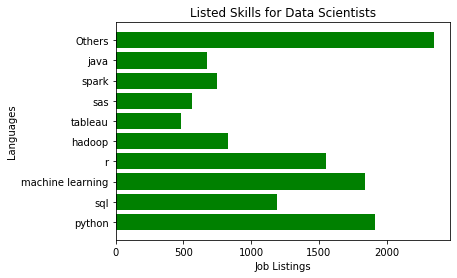

In [132]:
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data_scientist, color='green')
plt.ylabel("Languages")
plt.xlabel("Job Listings")
plt.title("Listed Skills for Data Scientists")

plt.yticks(x_pos, x)

plt.show()

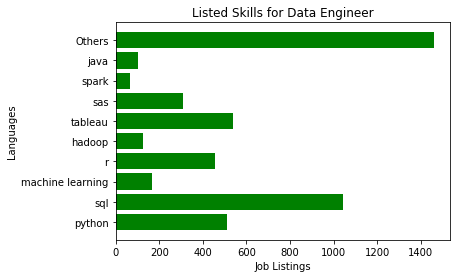

In [133]:
x_pos = [i for i, _ in enumerate(x)]

plt.barh(x_pos, data_analyst, color='green')
plt.ylabel("Languages")
plt.xlabel("Job Listings")
plt.title("Listed Skills for Data Engineer")

plt.yticks(x_pos, x)

plt.show()